# Visualization and PCA of South Africa Heart Disease Dataset

## Loading data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure, plot, title, legend, xlabel, ylabel, show

In [2]:
df = pd.read_csv(r"C:\Users\Owner\Desktop\on campis\SAheart.data.txt", index_col = 'row.names')
df = df[[c for c in df if c not in ['famhist']] 
       + ['famhist']]

In [3]:
df.head(20)

,sbp,tobacco,ldl,adiposity,typea,obesity,alcohol,age,chd,famhist
row.names,,,,,,,,,,
1,160,12.00,5.73,23.11,49,25.30,97.20,52,1,Present
2,144,0.01,4.41,28.61,55,28.87,2.06,63,1,Absent
3,118,0.08,3.48,32.28,52,29.14,3.81,46,0,Present
4,170,7.50,6.41,38.03,51,31.99,24.26,58,1,Present
5,134,13.60,3.50,27.78,60,25.99,57.34,49,1,Present
6,132,6.20,6.47,36.21,62,30.77,14.14,45,0,Present
7,142,4.05,3.38,16.20,59,20.81,2.62,38,0,Absent
8,114,4.08,4.59,14.60,62,23.11,6.72,58,1,Present
9,114,0.00,3.83,19.40,49,24.86,2.49,29,0,Present


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 462 entries, 1 to 463
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   sbp        462 non-null    int64  
 1   tobacco    462 non-null    float64
 2   ldl        462 non-null    float64
 3   adiposity  462 non-null    float64
 4   typea      462 non-null    int64  
 5   obesity    462 non-null    float64
 6   alcohol    462 non-null    float64
 7   age        462 non-null    int64  
 8   chd        462 non-null    int64  
 9   famhist    462 non-null    object 
dtypes: float64(5), int64(4), object(1)
memory usage: 39.7+ KB


In [5]:
df.shape

(462, 10)

In [6]:
raw_data = df.values  
raw_data

array([[160, 12.0, 5.73, ..., 52, 1, 'Present'],
       [144, 0.01, 4.41, ..., 63, 1, 'Absent'],
       [118, 0.08, 3.48, ..., 46, 0, 'Present'],
       ...,
       [108, 3.0, 1.59, ..., 55, 0, 'Absent'],
       [118, 5.4, 11.61, ..., 40, 0, 'Absent'],
       [132, 0.0, 4.82, ..., 46, 1, 'Present']], dtype=object)

In [7]:
cols = range(0, 9) 
X = raw_data[:, cols]
X = np.asarray(X, dtype = np.intc)
X

array([[160,  12,   5, ...,  97,  52,   1],
       [144,   0,   4, ...,   2,  63,   1],
       [118,   0,   3, ...,   3,  46,   0],
       ...,
       [108,   3,   1, ...,  26,  55,   0],
       [118,   5,  11, ...,  23,  40,   0],
       [132,   0,   4, ...,   0,  46,   1]], dtype=int32)

In [8]:
attributeNames = np.asarray(df.columns[cols])
attributeNames

array(['sbp', 'tobacco', 'ldl', 'adiposity', 'typea', 'obesity',
       'alcohol', 'age', 'chd'], dtype=object)

In [9]:
classLabels = raw_data[:,-1] # -1 takes the last column
classLabels

array(['Present', 'Absent', 'Present', 'Present', 'Present', 'Present',
       'Absent', 'Present', 'Present', 'Present', 'Absent', 'Present',
       'Absent', 'Absent', 'Present', 'Present', 'Absent', 'Present',
       'Present', 'Present', 'Absent', 'Present', 'Present', 'Absent',
       'Absent', 'Present', 'Absent', 'Absent', 'Present', 'Absent',
       'Absent', 'Absent', 'Present', 'Absent', 'Absent', 'Absent',
       'Absent', 'Absent', 'Present', 'Present', 'Present', 'Absent',
       'Absent', 'Present', 'Absent', 'Absent', 'Present', 'Present',
       'Absent', 'Absent', 'Present', 'Absent', 'Absent', 'Present',
       'Absent', 'Absent', 'Absent', 'Absent', 'Absent', 'Present',
       'Absent', 'Present', 'Present', 'Absent', 'Absent', 'Present',
       'Present', 'Absent', 'Present', 'Absent', 'Absent', 'Absent',
       'Absent', 'Present', 'Absent', 'Absent', 'Absent', 'Present',
       'Absent', 'Present', 'Present', 'Absent', 'Present', 'Absent',
       'Present', 'Absen

In [10]:
# Then determine which classes are in the data by finding the set of 
# unique class labels 
classNames = sorted(set(classLabels))
classNames


['Absent', 'Present']

In [11]:
# We can assign each type of Iris class with a number by making a
# Python dictionary as so:
classDict = dict(zip(classNames,range(len(classNames))))

classDict

{'Absent': 0, 'Present': 1}

In [12]:
y = np.array([classDict[cl] for cl in classLabels])
N, M = X.shape
C = len(classNames)

In [13]:
y

array([1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1,
       1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1,
       1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1,

In [14]:
df.describe()

,sbp,tobacco,ldl,adiposity,typea,obesity,alcohol,age,chd
count,462.000000,462.000000,462.000000,462.000000,462.000000,462.000000,462.000000,462.000000,462.000000
mean,138.326840,3.635649,4.740325,25.406732,53.103896,26.044113,17.044394,42.816017,0.346320
std,20.496317,4.593024,2.070909,7.780699,9.817534,4.213680,24.481059,14.608956,0.476313
min,101.000000,0.000000,0.980000,6.740000,13.000000,14.700000,0.000000,15.000000,0.000000
25%,124.000000,0.052500,3.282500,19.775000,47.000000,22.985000,0.510000,31.000000,0.000000
50%,134.000000,2.000000,4.340000,26.115000,53.000000,25.805000,7.510000,45.000000,0.000000
75%,148.000000,5.500000,5.790000,31.227500,60.000000,28.497500,23.892500,55.000000,1.000000
max,218.000000,31.200000,15.330000,42.490000,78.000000,46.580000,147.190000,64.000000,1.000000


In [15]:
#week 3

In [16]:
# PCA week 2

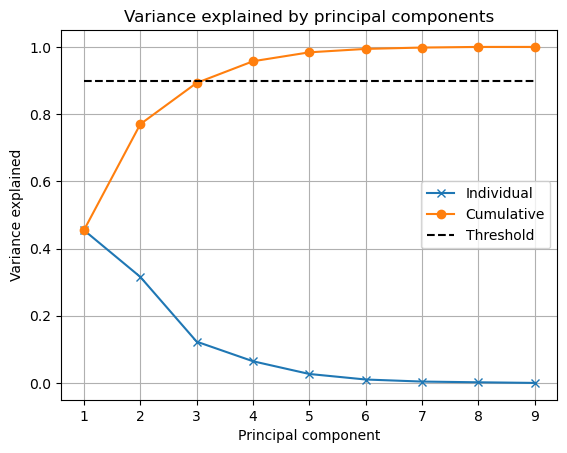

In [17]:
import matplotlib.pyplot as plt
from scipy.linalg import svd

# Subtract mean value from data
Y = X - np.ones((N,1))*X.mean(axis=0)
Y = np.asarray(Y, dtype = np.intc)

# PCA by computing SVD of Y
U,S,V = svd(Y,full_matrices=False)

# Compute variance explained by principal components
rho = (S*S) / (S*S).sum() 

threshold = 0.9

# Plot variance explained
plt.figure()
plt.plot(range(1,len(rho)+1),rho,'x-')
plt.plot(range(1,len(rho)+1),np.cumsum(rho),'o-')
plt.plot([1,len(rho)],[threshold, threshold],'k--')
plt.title('Variance explained by principal components');
plt.xlabel('Principal component');
plt.ylabel('Variance explained');
plt.legend(['Individual','Cumulative','Threshold'])
plt.grid()
plt.show()


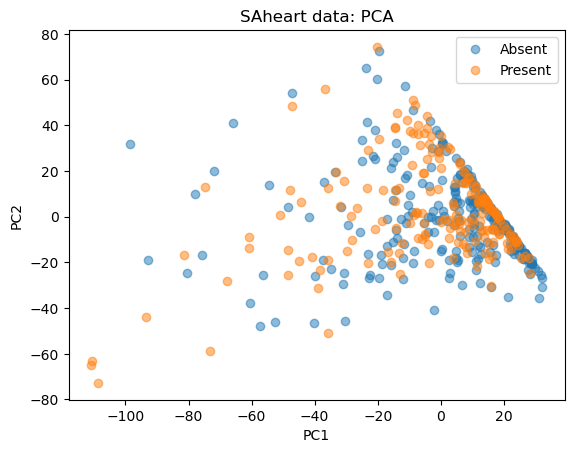

In [18]:
# PCA by computing SVD of Y
U,S,Vh = svd(Y,full_matrices=False)
# scipy.linalg.svd returns "Vh", which is the Hermitian (transpose)
# of the vector V. So, for us to obtain the correct V, we transpose:
V = Vh.T    

# Project the centered data onto principal component space
Z = Y @ V

# Indices of the principal components to be plotted
i = 0
j = 1

# Plot PCA of the data
f = figure()
title('SAheart data: PCA')
#Z = array(Z)
for c in range(C):
    # select indices belonging to class c:
    class_mask = y==c
    plot(Z[class_mask,i], Z[class_mask,j], 'o', alpha=.5)
legend(classNames)
xlabel('PC{0}'.format(i+1))
ylabel('PC{0}'.format(j+1))

# Output result to screen
show()


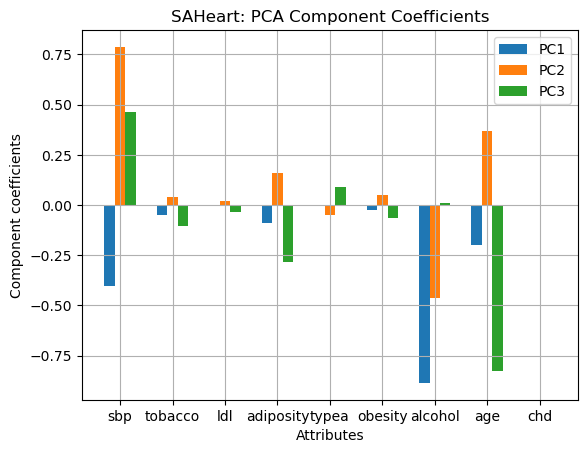

In [19]:
U,S,Vh = svd(Y,full_matrices=False)
V=Vh.T
N,M = X.shape

# We saw in 2.1.3 that the first 3 components explaiend more than 90
# percent of the variance. Let's look at their coefficients:
pcs = [0,1,2]
legendStrs = ['PC'+str(e+1) for e in pcs]
c = ['r','g','b']
bw = .2
r = np.arange(1,M+1)
for i in pcs:    
    plt.bar(r+i*bw, V[:,i], width=bw)
plt.xticks(r+bw, attributeNames)
plt.xlabel('Attributes')
plt.ylabel('Component coefficients')
plt.legend(legendStrs)
plt.grid()
plt.title('SAHeart: PCA Component Coefficients')
plt.show()


In [91]:
# Inspecting the plot, we see that the 2nd principal component has large
# (in magnitude) coefficients for attributes A, E and H. We can confirm
# this by looking at it's numerical values directly, too:

pcs = [0,1,2]
for i in pcs:
    print('PC',i+1)
    print(V[:,i])

PC 1
[ 0.31950386  0.30851094  0.33066002  0.49663859 -0.0083612   0.37398143
  0.11347089  0.45608646  0.29313789]
PC 2
[-0.16618452 -0.48094827  0.31303123  0.26382725  0.10358121  0.47101917
 -0.4949264  -0.16533555 -0.26191982]
PC 3
[ 0.20919337 -0.05288228 -0.14662766  0.09980588 -0.86974887 -0.0136723
 -0.10835456  0.14347354 -0.36469895]


In [89]:
# How does this translate to the actual data and its projections?
# Looking at the data for water:

# Projection of water class onto the 2nd principal component.
all_absent_data = Y[y==0,:]


pcs = [0,1,2]

for i in pcs:
    print('Absent observation PC',i+1)
    print(all_absent_data[i,:])
    print(' ')
    print('Projection absent PC', i+1)
    print(all_absent_data[i,:]@V[:,i])
    print(' ')

Absent observation PC 1
[  5  -3   0   3   1   2 -14  20   0]
 
Projection absent PC 1
10.434640640699296
 
Absent observation PC 2
[  3   0  -1  -8   5  -5 -14  -4   0]
 
Projection absent PC 2
2.830919167820997
 
Absent observation PC 3
[67  2 -2  7 18  0 39 17  0]
 
Projection absent PC 3
-2.5401697644636476
 


In [88]:

pcs = [0,1,2]

# Projection and observation of present class
all_present_data = Y[y==1,:]

for i in pcs:
    print('Present observation PC',i+1)
    print(all_present_data[i,:])
    print(' ')
    print('Projection present PC', i+1)
    print(all_present_data[i,:]@V[:,i])
    print(' ')

Present observation PC 1
[21  8  0 -1 -4  0 80  9  0]
 
Projection present PC 1
21.89692454356625
 
Present observation PC 2
[-20  -3  -1   7  -1   3 -13   3   0]
 
Projection present PC 2
13.547807491010722
 
Present observation PC 3
[31  3  1 13 -2  5  7 15  0]
 
Projection present PC 3
10.541953683071943
 


Text(0.5, 1.0, 'SAHeart: attribute standard deviations')

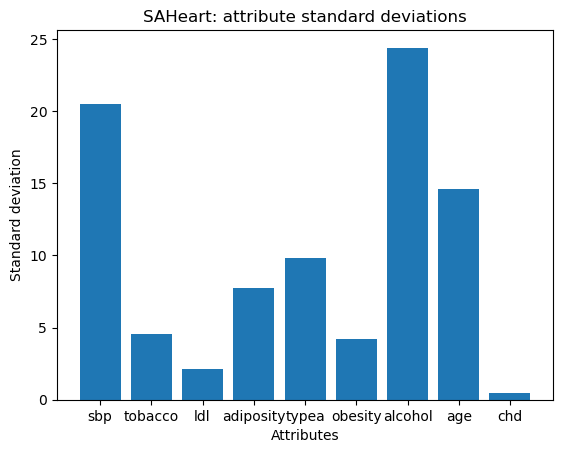

In [24]:
import matplotlib.pyplot as plt
from scipy.linalg import svd

r = np.arange(1,X.shape[1]+1)
plt.bar(r, np.std(X,0))
plt.xticks(r, attributeNames)
plt.ylabel('Standard deviation')
plt.xlabel('Attributes')
plt.title('SAHeart: attribute standard deviations')


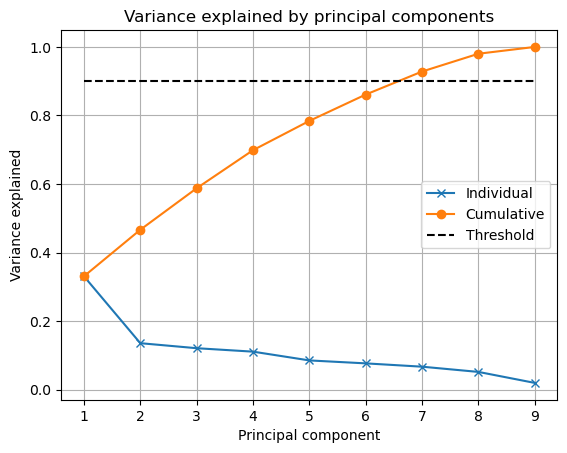

In [35]:
# Subtract the mean from the data and divide by the attribute standard
# deviation to obtain a standardized dataset:
Y2 = X - np.ones((N, 1))*X.mean(0)
Y2 = Y2*(1/np.std(Y2,0))
# Here were utilizing the broadcasting of a row vector to fit the dimensions 
# of Y2

U,S,Vh = svd(Y2,full_matrices=False)
V2=Vh.T
N,M = X.shape

# Compute variance explained by principal components
rho = (S*S) / (S*S).sum() 

threshold = 0.9

# Plot variance explained
plt.figure()
plt.plot(range(1,len(rho)+1),rho,'x-')
plt.plot(range(1,len(rho)+1),np.cumsum(rho),'o-')
plt.plot([1,len(rho)],[threshold, threshold],'k--')
plt.title('Variance explained by principal components');
plt.xlabel('Principal component');
plt.ylabel('Variance explained');
plt.legend(['Individual','Cumulative','Threshold'])
plt.grid()
plt.show()

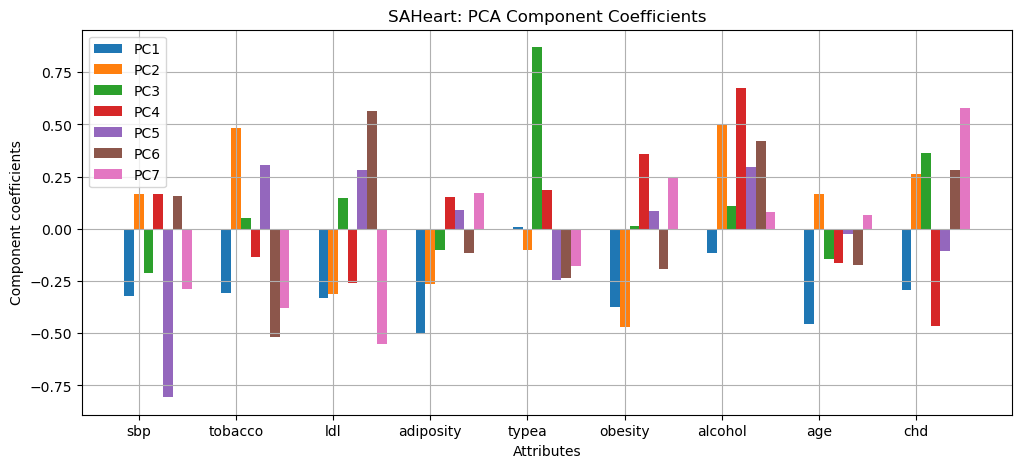

In [75]:
# Subtract the mean from the data and divide by the attribute standard
# deviation to obtain a standardized dataset:
Y2 = X - np.ones((N, 1))*X.mean(0)
Y2 = Y2*(1/np.std(Y2,0))
# Here were utilizing the broadcasting of a row vector to fit the dimensions 
# of Y2

U,S,Vh = svd(Y2,full_matrices=False)
V2=Vh.T
N,M = X.shape


# We saw in 2.1.3 that the first 3 components explaiend more than 90
# percent of the variance. Let's look at their coefficients:
pcs = [0,1,2,3,4,5,6]
legendStrs = ['PC'+str(e+1) for e in pcs]
c = ['r','g','b']
bw = .1
r = np.arange(1,M+1)
plt.figure(figsize=(12,5))

for i in pcs:
    plt.subplot()
    plt.bar(r+i*bw, V2[:,i], width=bw)
plt.xticks(r+bw, attributeNames)
plt.xlabel('Attributes')
plt.ylabel('Component coefficients')
plt.legend(legendStrs)
plt.grid()
plt.title('SAHeart: PCA Component Coefficients')
plt.show()

In [79]:
pcs = [0,1,2,3,4,5,6]
for i in pcs:
    print('PC',i+1)
    print(V2[:,i])

PC 1
[-0.31950386 -0.30851094 -0.33066002 -0.49663859  0.0083612  -0.37398143
 -0.11347089 -0.45608646 -0.29313789]
PC 2
[ 0.16618452  0.48094827 -0.31303123 -0.26382725 -0.10358121 -0.47101917
  0.4949264   0.16533555  0.26191982]
PC 3
[-0.20919337  0.05288228  0.14662766 -0.09980588  0.86974887  0.0136723
  0.10835456 -0.14347354  0.36469895]
PC 4
[ 0.16811862 -0.13577528 -0.25994853  0.15390794  0.18803334  0.35858851
  0.6746512  -0.16497504 -0.46446427]
PC 5
[-0.80633752  0.30760668  0.28293602  0.09028601 -0.24675414  0.08543835
  0.29411013 -0.02492854 -0.10809283]
PC 6
[ 0.15883195 -0.51694463  0.56197828 -0.1145489  -0.23468403 -0.19384925
  0.41896435 -0.17530215  0.28228271]
PC 7
[-0.28785745 -0.37846174 -0.5496669   0.17373609 -0.17957299  0.24830533
  0.07836365  0.0674779   0.58050904]


In [85]:
# Projection and observation of absent class
all_absent_data = Y2[y==0,:]

for i in pcs:
    print('Absent observation PC',i+1)
    print(all_absent_data[i,:])
    print(' ')
    print('Projection Absent PC', i+1)
    print(all_absent_data[i,:]@V2[:,i])
    print(' ')

Absent observation PC 1
[ 0.27708929 -0.73592703 -0.11284422  0.39708486  0.19334379  0.57952514
 -0.60239976  1.3831147   1.37386317]
 
Projection Absent PC 1
-1.2016956056760248
 
Absent observation PC 2
[ 0.17940501  0.14148791 -0.58252015 -1.14670087  0.60121974 -1.32102936
 -0.60239976 -0.33001932 -0.72787453]
 
Projection Absent PC 2
0.5993434887481308
 
Absent observation PC 3
[ 3.30530202  0.58019537 -1.05219609  0.9116801   1.92681658  0.10438652
  1.61225824  1.17753861  1.37386317]
 
Projection Absent PC 3
1.2780328097456166
 
Absent observation PC 4
[-0.99280637 -0.73592703 -1.52187203 -1.91859373  0.60121974 -1.08346005
 -0.68442413 -1.7690519  -0.72787453]
 
Projection Absent PC 4
-0.07396035839190046
 
Absent observation PC 5
[-0.3090164  -0.73592703 -1.52187203 -1.01805206 -0.41847013 -0.60832142
 -0.68442413 -1.90610262 -0.72787453]
 
Projection Absent PC 5
-0.5235292587439897
 
Absent observation PC 6
[-0.89512209  0.79954911  5.05359108 -0.37480801  0.70318873 -0.133

In [86]:
# Projection and observation of present class
all_present_data = Y2[y==1,:]

for i in pcs:
    print('Present observation PC',i+1)
    print(all_present_data[i,:])
    print(' ')
    print('Projection present PC', i+1)
    print(all_present_data[i,:]@V2[:,i])
    print(' ')

Present observation PC 1
[ 1.05856354  1.89631778  0.35683172 -0.2461592  -0.41847013 -0.1331828
  3.29375784  0.62933573  1.37386317]
 
Projection present PC 1
-1.9361872692888737
 
Present observation PC 2
[-0.99280637 -0.73592703 -0.58252015  0.9116801  -0.11256317  0.81709446
 -0.56138757  0.21818356 -0.72787453]
 
Projection present PC 2
-1.38273544955322
 
Present observation PC 3
[ 1.54698495  0.79954911  0.82650765  1.68357296 -0.21453216  1.29223308
  0.29986832  1.04048789  1.37386317]
 
Projection present PC 3
-0.11284382439482284
 
Present observation PC 4
[-0.21133212  2.11567151 -0.58252015  0.26843605  0.70318873 -0.1331828
  1.65327043  0.42375964  1.37386317]
 
Projection present PC 4
0.36178081985047417
 
Present observation PC 5
[-0.3090164   0.58019537  0.82650765  1.42627534  0.9071267   1.05466377
 -0.11025354  0.1496582  -0.72787453]
 
Projection present PC 5
0.6990570275999604
 
Present observation PC 6
[-1.18817494  0.14148791 -0.11284422 -1.40399849  0.9071267

In [102]:
#week 4

In [27]:
import pandas as pd

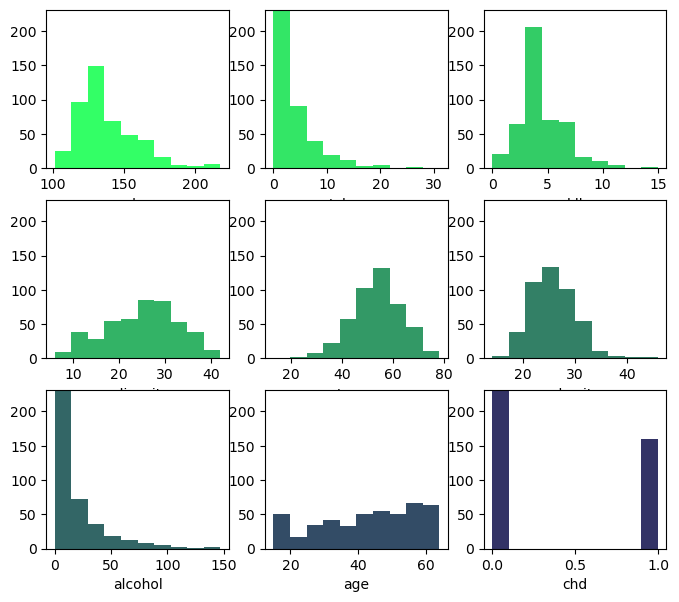

In [28]:


from matplotlib.pyplot import figure, subplot, hist, xlabel, ylim, show
import numpy as np


figure(figsize=(8,7))
u = int(np.floor(np.sqrt(M))); v = int(np.ceil(float(M)/u))
for i in range(M):
    subplot(u,v,i+1)
    hist(X[:,i], color=(0.2, 1-i*0.1, 0.4))
    xlabel(attributeNames[i])
    ylim(0,N/2)
    
show()


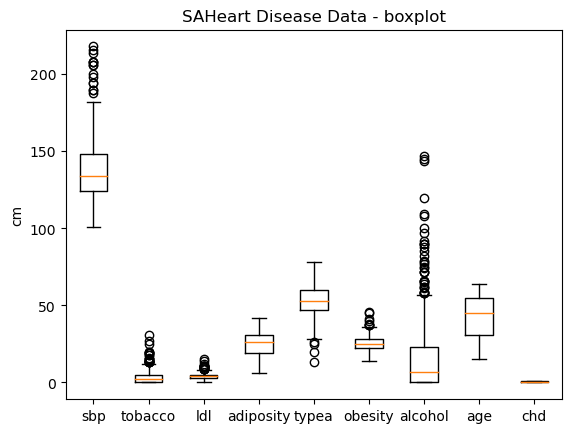

In [29]:


from matplotlib.pyplot import boxplot, xticks, ylabel, title, show



boxplot(X)
xticks(range(1,10),attributeNames)
ylabel('cm')
title('SAHeart Disease Data - boxplot')
show()



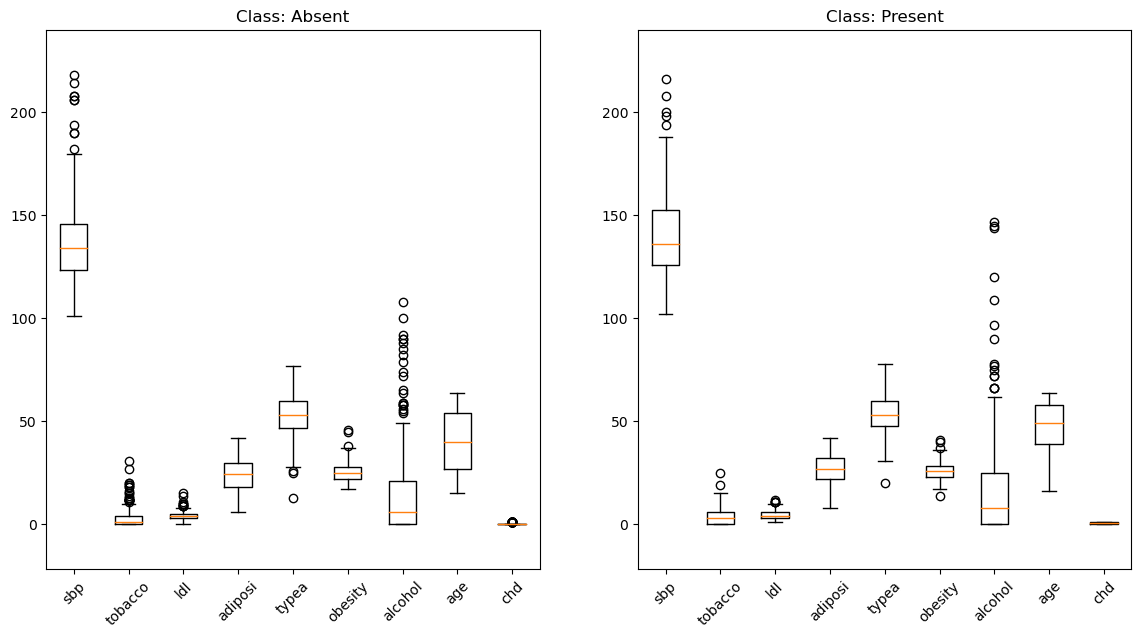

In [30]:

from matplotlib.pyplot import (figure, subplot, boxplot, title, xticks, ylim, 
                               show)


figure(figsize=(14,7))
for c in range(C):
    subplot(1,C,c+1)
    class_mask = (y==c) 
    
    boxplot(X[class_mask,:])
    #title('Class: {0}'.format(classNames[c]))
    title('Class: '+classNames[c])
    xticks(range(1,len(attributeNames)+1), [a[:7] for a in attributeNames], rotation=45)
    y_up = X.max()+(X.max()-X.min())*0.1; y_down = X.min()-(X.max()-X.min())*0.1
    ylim(y_down, y_up)

show()


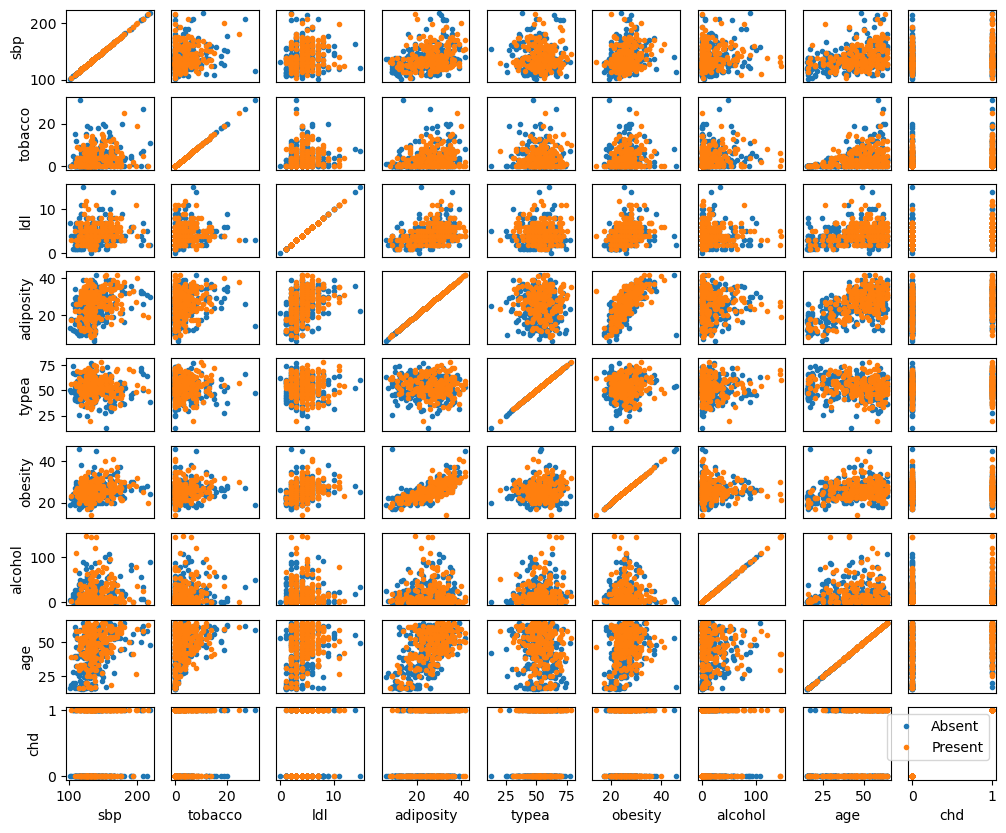

In [31]:


from matplotlib.pyplot import (figure, subplot, plot, xlabel, ylabel, 
                               xticks, yticks,legend,show)



figure(figsize=(12,10))
for m1 in range(M):
    for m2 in range(M):
        subplot(M, M, m1*M + m2 + 1)
        for c in range(C):
            class_mask = (y==c)
            plot(np.array(X[class_mask,m2]), np.array(X[class_mask,m1]), '.')
            if m1==M-1:
                xlabel(attributeNames[m2])
            else:
                xticks([])
            if m2==0:
                ylabel(attributeNames[m1])
            else:
                yticks([])
            #ylim(0,X.max()*1.1)
            #xlim(0,X.max()*1.1)
legend(classNames)

show()

